In [1]:
import pandas as pd
import os
import sys
import yfinance as yf
import plotly as px




In [2]:
# Define the path to the data directory
data_directory = 'c:/Users/Yibabe/Desktop/kifiyaweek1/data'

# List of CSV filenames
csv_files = [
    'AAPL_historical_data.csv',
    'AMZN_historical_data.csv',
    'GOOG_historical_data.csv',
    'META_historical_data.csv',
    'MSFT_historical_data.csv',
    'NVDA_historical_data.csv',
    'TSLA_historical_data.csv'
]
# Create a dictionary to hold DataFrames
dfs = {}

# Load CSV files into DataFrames
for file in csv_files:
    file_path = os.path.join(data_directory, file)
    dfs[file] = pd.read_csv(file_path)

# Check the loaded DataFrames
for name, df in dfs.items():
    print(f"{df.head()}")

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.0875

In [3]:
# Ensure data includes required columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for name, df in dfs.items():
    if all(col in df.columns for col in required_columns):
        print(f"All required columns are present in {name}.")
    else:
        missing_cols = [col for col in required_columns if col not in df.columns]
        print(f"Missing columns in {name}: {missing_cols}")

All required columns are present in AAPL_historical_data.csv.
All required columns are present in AMZN_historical_data.csv.
All required columns are present in GOOG_historical_data.csv.
All required columns are present in META_historical_data.csv.
All required columns are present in MSFT_historical_data.csv.
All required columns are present in NVDA_historical_data.csv.
All required columns are present in TSLA_historical_data.csv.


In [4]:
import talib

# Apply technical indicators to each DataFrame
for name, df in dfs.items():
    # Ensure 'Close' column is a float for TA-Lib functions
    df['Close'] = df['Close'].astype(float)
    
    # Calculate Simple Moving Average (SMA)
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    
    # Calculate Relative Strength Index (RSI)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    print(f"Technical indicators applied to {name}.")
    print(df[['Close', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']].head())


Technical indicators applied to AAPL_historical_data.csv.
      Close  SMA_20  RSI  MACD  MACD_Signal  MACD_Hist
0  0.128348     NaN  NaN   NaN          NaN        NaN
1  0.121652     NaN  NaN   NaN          NaN        NaN
2  0.112723     NaN  NaN   NaN          NaN        NaN
3  0.115513     NaN  NaN   NaN          NaN        NaN
4  0.118862     NaN  NaN   NaN          NaN        NaN
Technical indicators applied to AMZN_historical_data.csv.
      Close  SMA_20  RSI  MACD  MACD_Signal  MACD_Hist
0  0.097917     NaN  NaN   NaN          NaN        NaN
1  0.086458     NaN  NaN   NaN          NaN        NaN
2  0.085417     NaN  NaN   NaN          NaN        NaN
3  0.081771     NaN  NaN   NaN          NaN        NaN
4  0.071354     NaN  NaN   NaN          NaN        NaN
Technical indicators applied to GOOG_historical_data.csv.
      Close  SMA_20  RSI  MACD  MACD_Signal  MACD_Hist
0  2.499133     NaN  NaN   NaN          NaN        NaN
1  2.697639     NaN  NaN   NaN          NaN        NaN
2

Technical indicators applied to AAPL_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
33  0.126116  0.140681  39.642837 -0.000377     0.001789  -0.002166
34  0.118862  0.139090  34.943807 -0.001930     0.001045  -0.002975
35  0.123326  0.138058  39.682098 -0.002769     0.000282  -0.003051
36  0.127790  0.137556  44.069116 -0.003038    -0.000382  -0.002656
37  0.127790  0.137193  44.069116 -0.003215    -0.000949  -0.002266


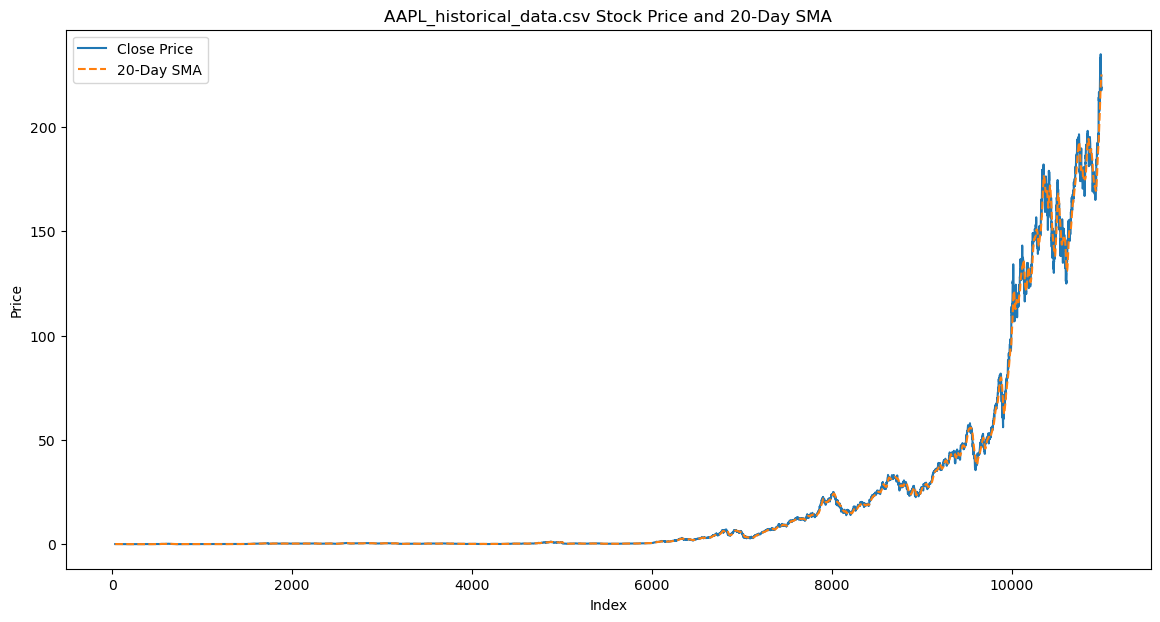

Technical indicators applied to AMZN_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
33  0.079427  0.077474  45.905515 -0.000362    -0.000402   0.000040
34  0.095573  0.078398  65.736768  0.001149    -0.000092   0.001241
35  0.100000  0.079258  69.083471  0.002673     0.000461   0.002212
36  0.115104  0.080794  77.248611  0.005041     0.001377   0.003664
37  0.116146  0.082643  77.686438  0.006922     0.002486   0.004436


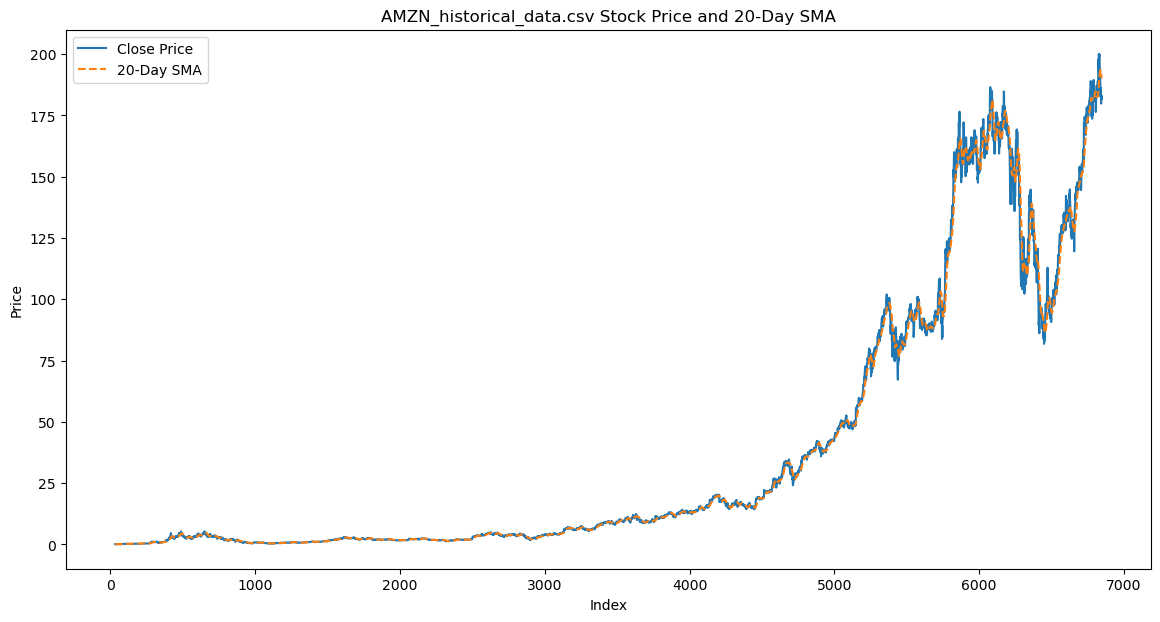

Technical indicators applied to GOOG_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
33  3.414203  3.007739  77.222667  0.217632     0.175030   0.042601
34  3.458287  3.053243  78.397725  0.222993     0.184623   0.038370
35  3.430392  3.093592  75.735263  0.222427     0.192184   0.030244
36  3.368873  3.128162  70.082526  0.214542     0.196655   0.017887
37  3.422173  3.160429  72.030353  0.210171     0.199358   0.010812


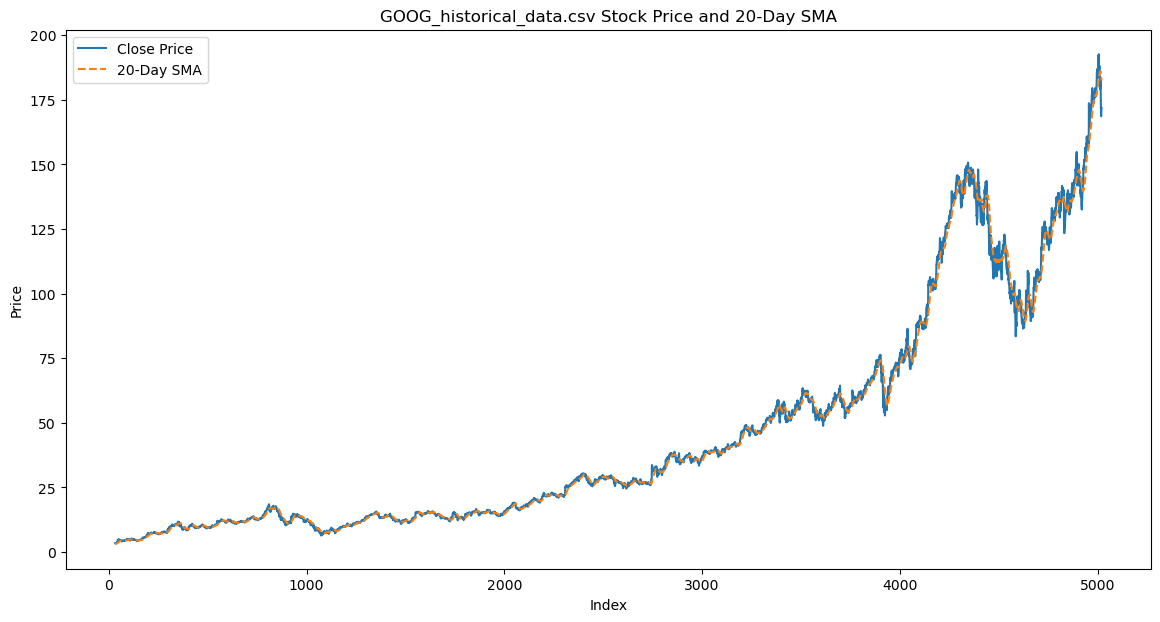

Technical indicators applied to META_historical_data.csv.
        Close   SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
33  30.980000  30.4485  55.862919  1.212021     1.421569  -0.209549
34  29.730000  30.5465  48.511187  1.029767     1.343209  -0.313442
35  28.110001  30.5140  40.983457  0.746009     1.223769  -0.477759
36  28.639999  30.4750  44.042765  0.557470     1.090509  -0.533039
37  29.049999  30.4745  46.359292  0.436107     0.959629  -0.523521


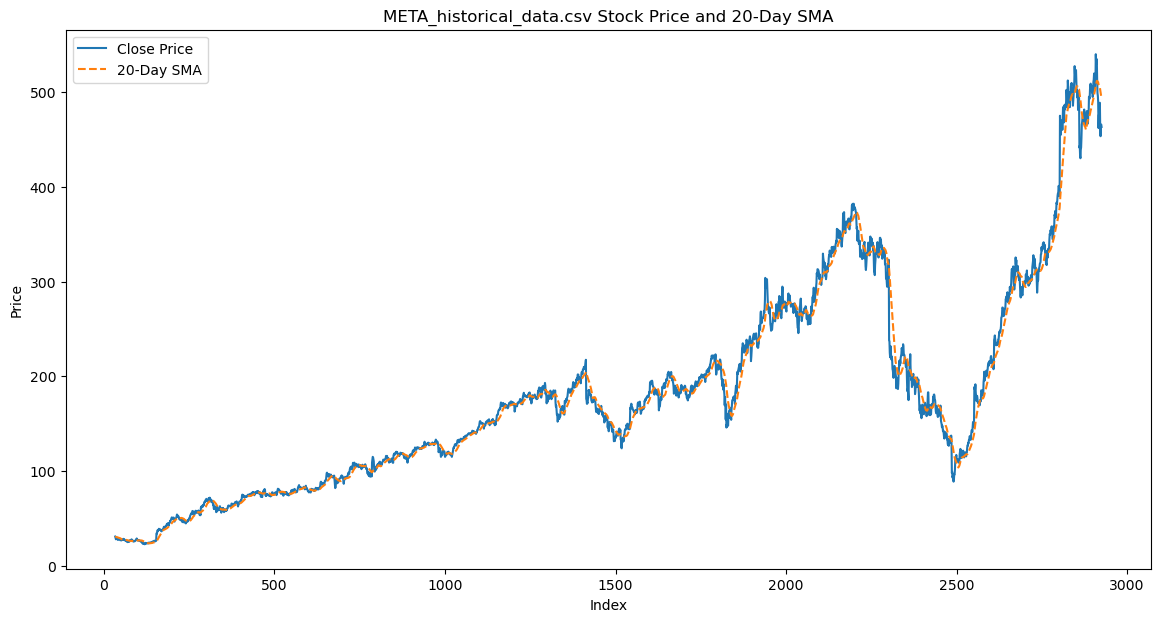

Technical indicators applied to MSFT_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
33  0.111979  0.103190  62.748695  0.004669     0.002862   0.001806
34  0.110243  0.103884  59.499148  0.004501     0.003190   0.001311
35  0.110243  0.104579  59.499148  0.004319     0.003416   0.000903
36  0.109375  0.105317  57.764472  0.004058     0.003544   0.000513
37  0.110243  0.106055  59.050185  0.003876     0.003611   0.000265


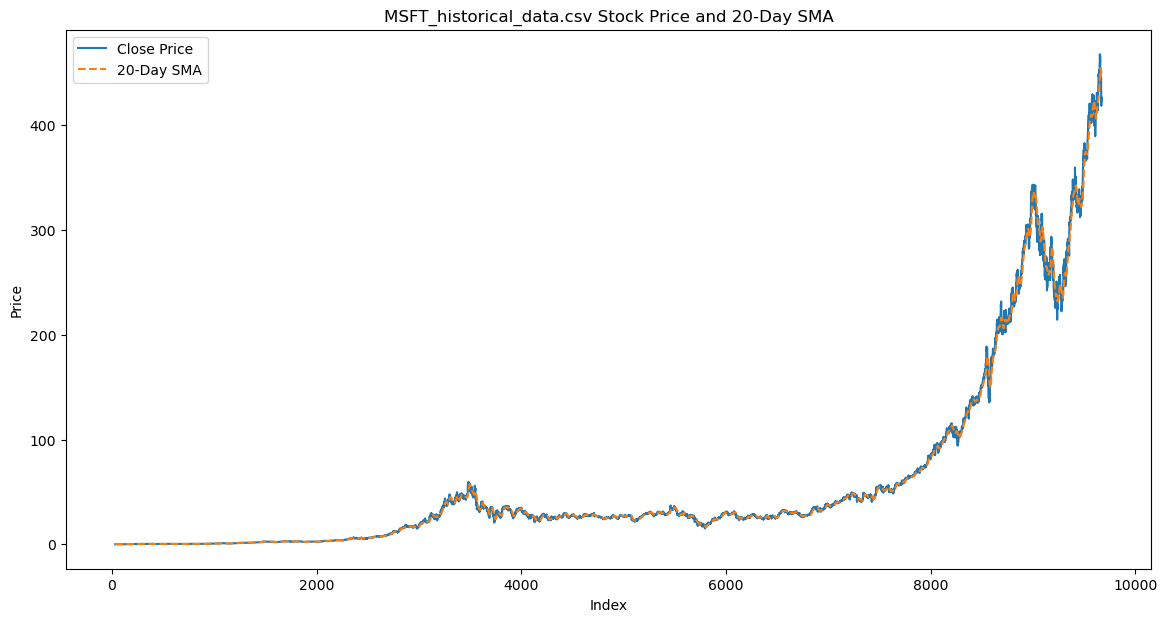

Technical indicators applied to NVDA_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
33  0.043229  0.044316  48.888877  0.001159     0.001601  -0.000442
34  0.042448  0.044381  47.071744  0.000929     0.001466  -0.000537
35  0.044271  0.044421  51.594395  0.000885     0.001350  -0.000465
36  0.042839  0.044375  48.116318  0.000725     0.001225  -0.000500
37  0.043099  0.044460  48.791311  0.000613     0.001103  -0.000490


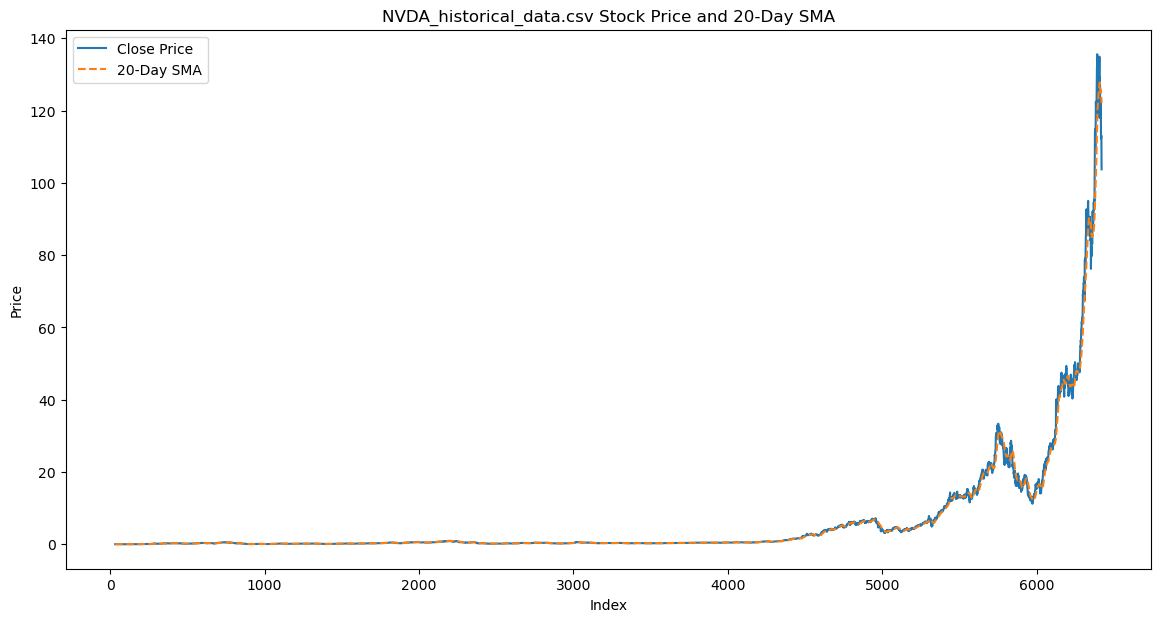

Technical indicators applied to TSLA_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
33  1.252000  1.335733  40.267058 -0.017575     0.012807  -0.030381
34  1.276667  1.331900  42.516169 -0.016728     0.006900  -0.023628
35  1.251333  1.327067  40.816350 -0.017895     0.001941  -0.019836
36  1.252667  1.319700  40.950221 -0.018499    -0.002147  -0.016352
37  1.273333  1.312400  43.097644 -0.017113    -0.005140  -0.011973


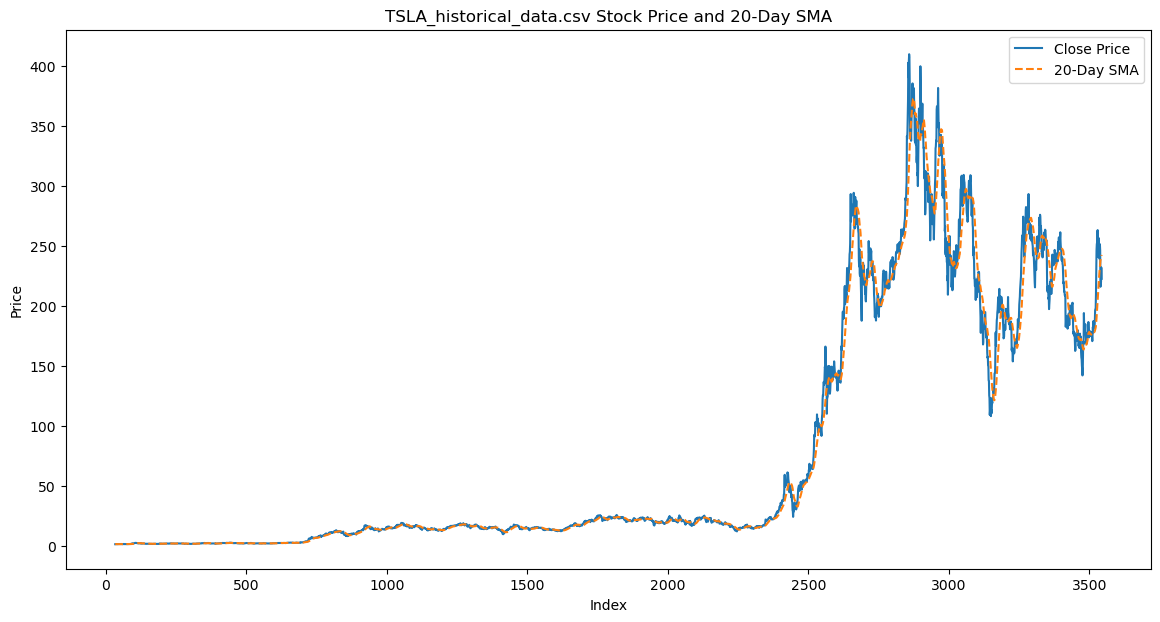

In [5]:

import talib
import matplotlib.pyplot as plt

# Define the path to the data directory
data_directory = 'c:/Users/Yibabe/Desktop/kifiyaweek1/data'

# List of CSV filenames
csv_files = [
    'AAPL_historical_data.csv',
    'AMZN_historical_data.csv',
    'GOOG_historical_data.csv',
    'META_historical_data.csv',
    'MSFT_historical_data.csv',
    'NVDA_historical_data.csv',
    'TSLA_historical_data.csv'
]

# Create a dictionary to hold DataFrames
dfs = {}

# Load CSV files into DataFrames
for file in csv_files:
    file_path = os.path.join(data_directory, file)
    dfs[file] = pd.read_csv(file_path)

# Apply technical indicators to each DataFrame
for name, df in dfs.items():
    # Ensure 'Close' column is a float for TA-Lib functions
    df['Close'] = df['Close'].astype(float)
    
    # Calculate Simple Moving Average (SMA)
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    
    # Calculate Relative Strength Index (RSI)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    # Remove rows with NaN values for clean analysis
    df = df.dropna()

    # Save the cleaned DataFrame back to the dictionary
    dfs[name] = df

    print(f"Technical indicators applied to {name}.")
    print(df[['Close', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']].head())

    # Visualization example (adjust date indexing if needed)
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['SMA_20'], label='20-Day SMA', linestyle='--')
    plt.title(f'{name} Stock Price and 20-Day SMA')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


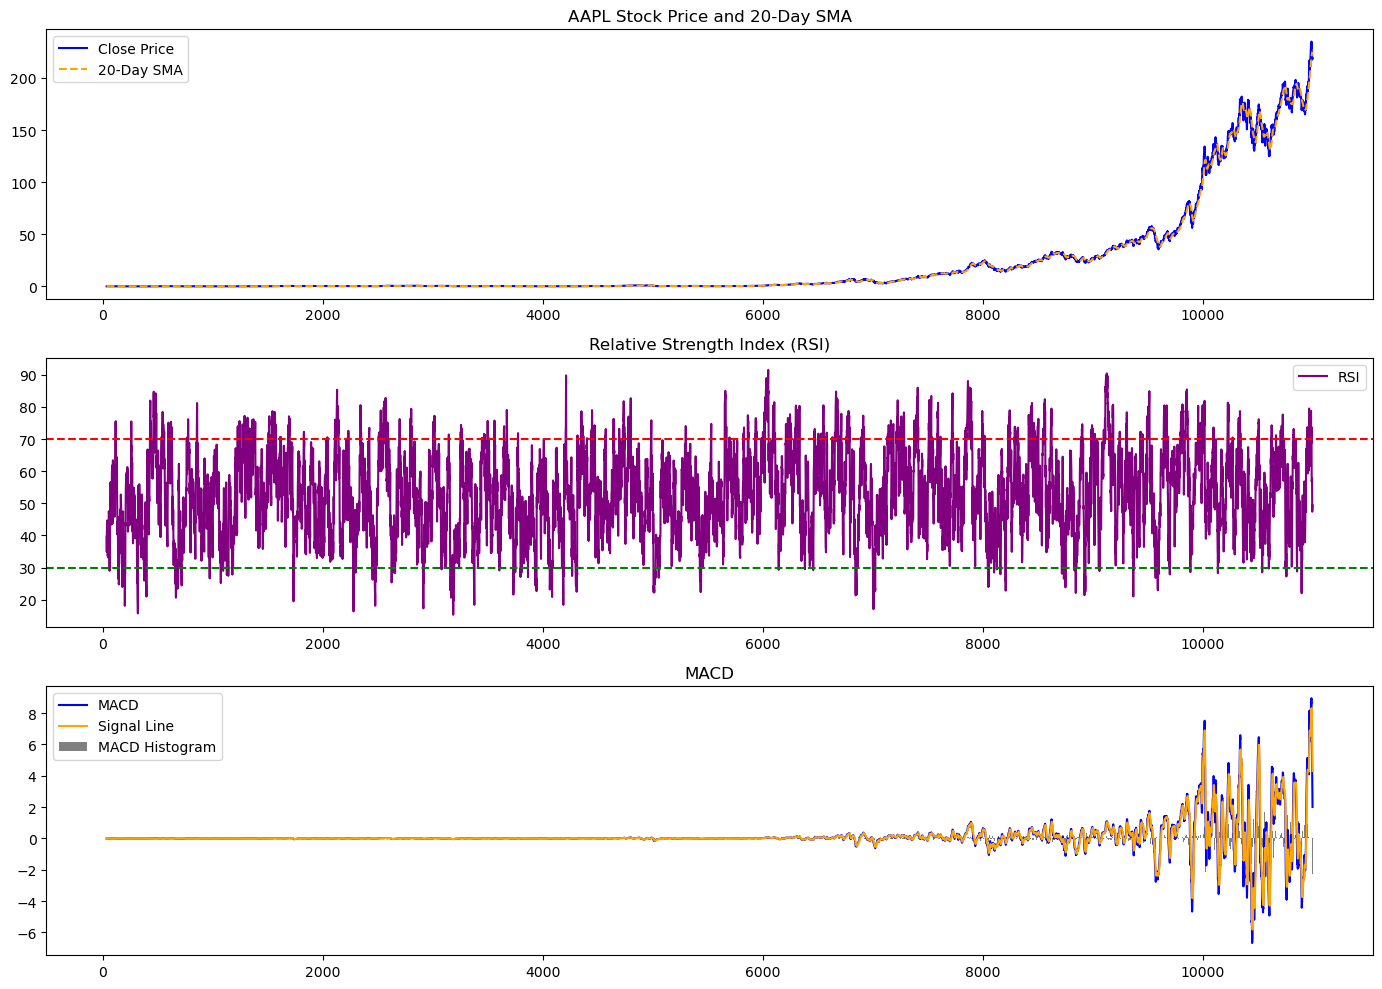

In [6]:
import matplotlib.pyplot as plt

# Example visualization for one stock (e.g., AAPL)
df = dfs['AAPL_historical_data.csv']

plt.figure(figsize=(14, 10))

# Plot Close Price
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_20'], label='20-Day SMA', linestyle='--', color='orange')
plt.title('AAPL Stock Price and 20-Day SMA')
plt.legend()

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()

# Plot MACD
plt.subplot(3, 1, 3)
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='grey')
plt.title('MACD')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:

from pypfopt import expected_returns, risk_models, EfficientFrontier



In [11]:
# Example of loading data
data_directory = 'c:/Users/Yibabe/Desktop/kifiyaweek1/data'
csv_files = [
    'AAPL_historical_data.csv',
    'AMZN_historical_data.csv',
    'GOOG_historical_data.csv',
    'META_historical_data.csv',
    'MSFT_historical_data.csv',
    'NVDA_historical_data.csv',
    'TSLA_historical_data.csv'
]

# Create a dictionary to hold DataFrames
dfs = {}

# Load CSV files into DataFrames
for file in csv_files:
    file_path = os.path.join(data_directory, file)
    df = pd.read_csv(file_path, parse_dates=True, index_col='Date')
    dfs[file.split('_')[0]] = df  # Use stock ticker as key

# Combine into a single DataFrame (Close prices only)
data = pd.concat([df['Close'].rename(ticker) for ticker, df in dfs.items()], axis=1)
data.head()


,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
1980-12-12,0.128348,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.121652,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.112723,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.115513,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.118862,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def calculate_portfolio_weights(data, tickers):
    # Calculate expected returns and sample covariance matrix
    mu = expected_returns.mean_historical_return(data)
    cov = risk_models.sample_cov(data)

    # Optimize for maximum Sharpe ratio
    ef = EfficientFrontier(mu, cov)
    weights = ef.max_sharpe()
    
    # Convert weights to a dictionary
    weights = dict(zip(tickers, weights.values()))
    
    return weights

# List of tickers
tickers = list(dfs.keys())

# Calculate the portfolio weights
weights = calculate_portfolio_weights(data, tickers)

# Display the weights
weights


{'AAPL': 0.0,
 'AMZN': 0.0843706575071178,
 'GOOG': 0.2592248252304332,
 'META': 0.1552366615007858,
 'MSFT': 0.2050878359237228,
 'NVDA': 0.0684029723114252,
 'TSLA': 0.2276770475265151}

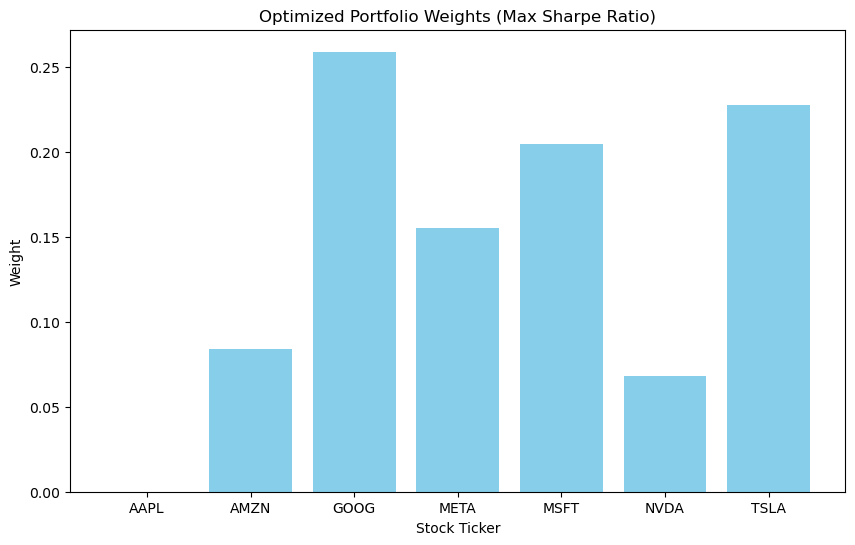

In [13]:
# Visualize the portfolio weights
plt.figure(figsize=(10, 6))
plt.bar(weights.keys(), weights.values(), color='skyblue')
plt.xlabel('Stock Ticker')
plt.ylabel('Weight')
plt.title('Optimized Portfolio Weights (Max Sharpe Ratio)')
plt.show()


In [17]:
def calculate_portfolio_performance(data, weights):
    mu = expected_returns.mean_historical_return(data)
    cov = risk_models.sample_cov(data)

    # Create an instance of Efficient Frontier
    ef = EfficientFrontier(mu, cov)

    # Set the portfolio weights
    ef.set_weights(weights)

    # Calculate the performance
    performance = ef.portfolio_performance(verbose=True)
    
    return performance

# Calculate and display the portfolio performance
performance = calculate_portfolio_performance(data, weights)


Expected annual return: 30.1%
Annual volatility: 29.0%
Sharpe Ratio: 0.97
